In [1]:
import pandas as pd

df = pd.read_csv('data/dataset.c128210b03b5e528dbf3.csv')
df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09


4800


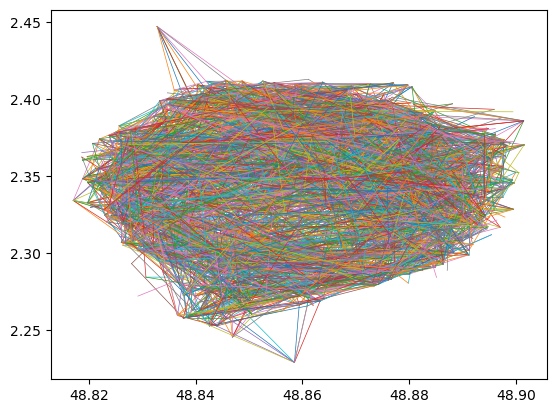

In [12]:
import matplotlib.pyplot as plt

#plt.scatter(x=df['start_lat'], y=df['start_lon'], color='red', s=5)
#plt.scatter(x=df['end_lat'], y=df['end_lon'], color='blue', s=5)

plt.plot()
print(df.shape[0])

for i in range(df.shape[0]):
    plt.plot([df['start_lat'].to_numpy()[i], df['end_lat'].to_numpy()[i]],
             [df['start_lon'].to_numpy()[i], df['end_lon'].to_numpy()[i]],
            linewidth=0.5)

plt.show()

In [13]:
df.describe()

,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,hour,minute,fee
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,48.859372,2.343179,75013.040000,48.859508,2.343550,75012.593750,4.462917,4.387917,12.980833,30.540625,1.936438
std,0.020661,0.038938,6.595513,0.019633,0.036029,7.258192,2.867186,2.860430,0.820684,16.728867,0.695627
min,48.817100,2.229100,75001.000000,48.817100,2.229100,75001.000000,0.000000,0.000000,12.000000,0.000000,0.590000
25%,48.843475,2.317050,75010.000000,48.844200,2.316550,75009.000000,2.000000,2.000000,12.000000,17.000000,1.390000
50%,48.859400,2.347000,75014.000000,48.860000,2.346800,75013.000000,5.000000,4.000000,13.000000,31.000000,1.890000
75%,48.876375,2.373525,75017.000000,48.875300,2.372200,75017.000000,7.000000,7.000000,14.000000,45.000000,2.490000
max,48.901500,2.447300,75116.000000,48.901500,2.447300,75116.000000,9.000000,9.000000,14.000000,59.000000,4.690000


(array([108., 184., 138., 360., 499., 257., 519., 522., 217., 422., 368.,
        206., 345., 124., 213., 142.,  51.,  56.,  37.,   7.,  12.,   5.,
          1.,   5.,   2.]),
 array([0.59 , 0.754, 0.918, 1.082, 1.246, 1.41 , 1.574, 1.738, 1.902,
        2.066, 2.23 , 2.394, 2.558, 2.722, 2.886, 3.05 , 3.214, 3.378,
        3.542, 3.706, 3.87 , 4.034, 4.198, 4.362, 4.526, 4.69 ]),
 <BarContainer object of 25 artists>)

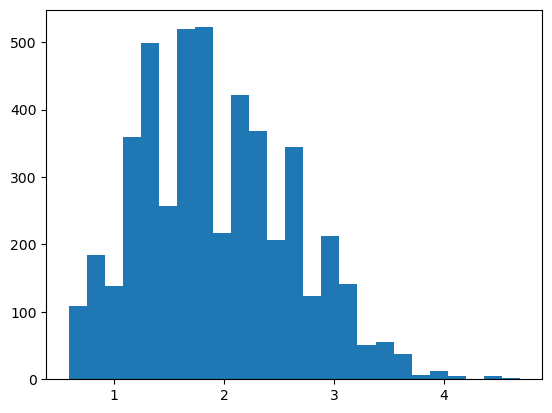

In [57]:
plt.hist(df['fee'], bins=25)

In [18]:
import geopy.distance

df['distance'] = df.apply(lambda x :
    geopy.distance.geodesic((x['start_lat'], x['start_lon']), (x['end_lat'], x['end_lon'])).km, axis=1)

df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,distance
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69,1.614514
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59,2.994697
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2.756647
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79,2.450320
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09,3.462698


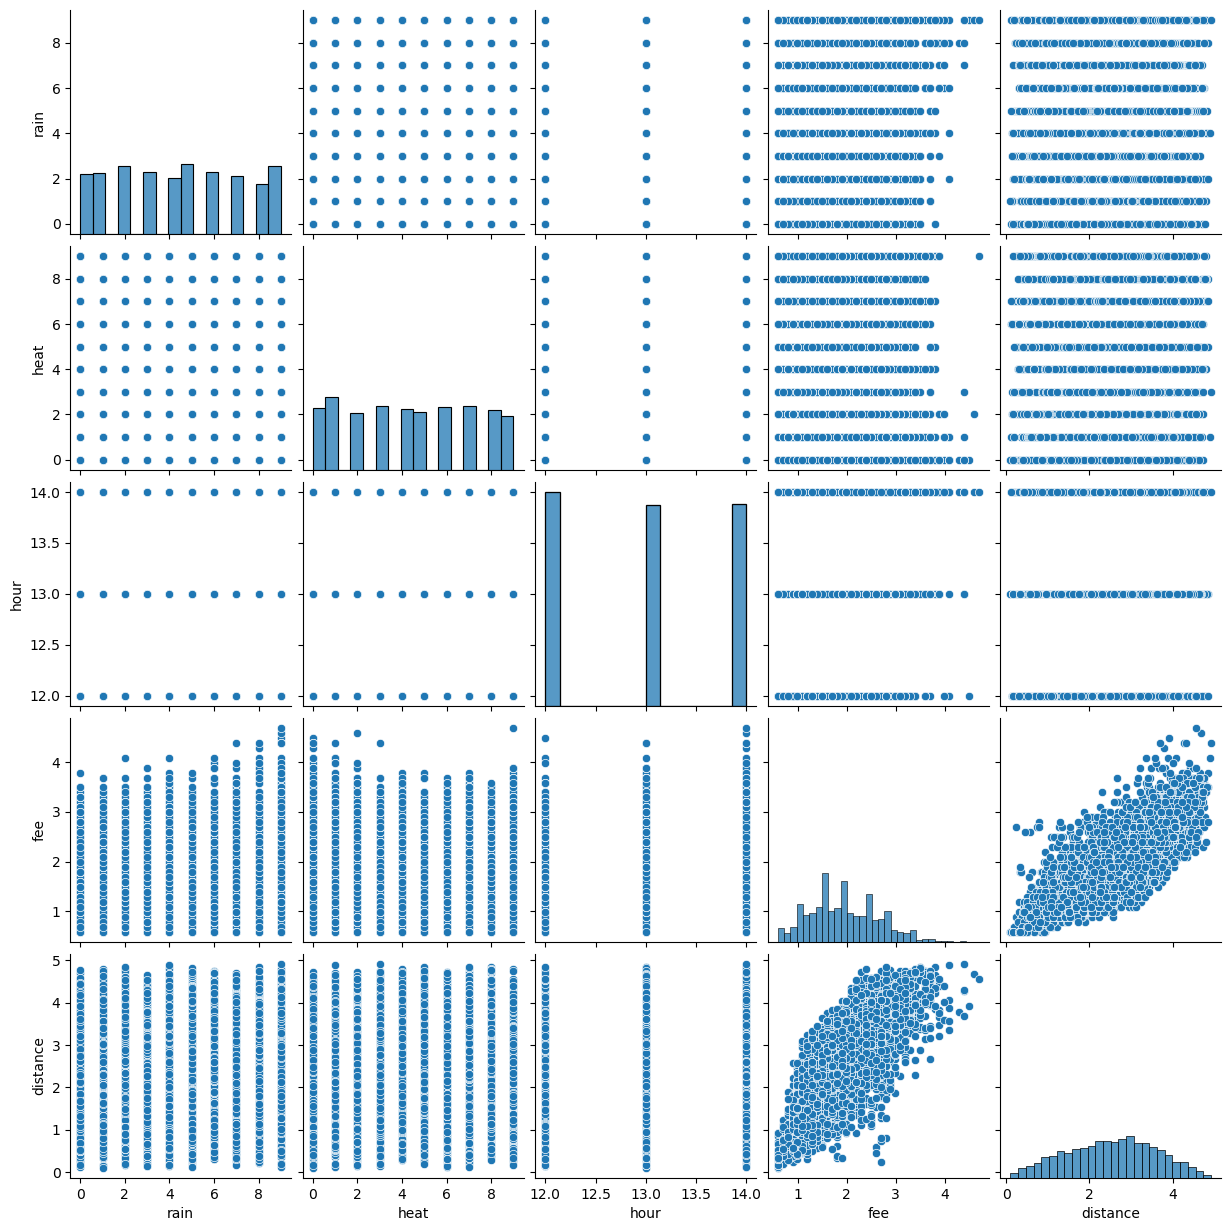

In [36]:
import seaborn as sns
sns.pairplot(df[['rain', 'heat', 'day_of_week', 'hour', 'fee', 'distance']])

/tmp/ipykernel_124/951714979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['rain', 'heat', 'day_of_week', 'hour', 'fee', 'distance']].corr()


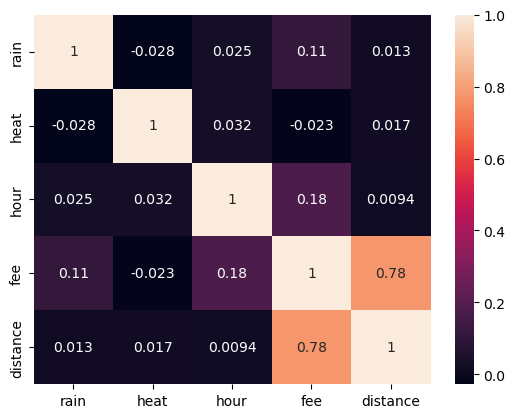

In [38]:
corr_matrix = df[['rain', 'heat', 'day_of_week', 'hour', 'fee', 'distance']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot: xlabel='distance', ylabel='fee'>

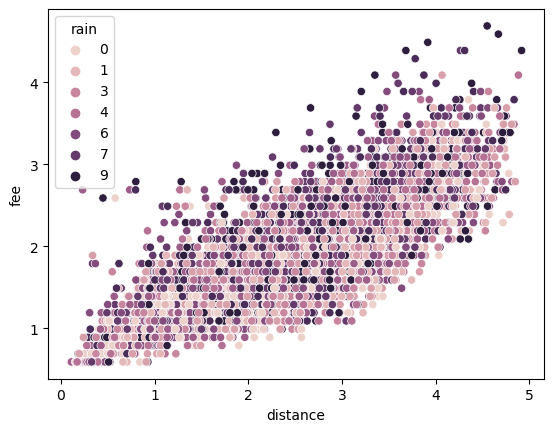

In [31]:
import seaborn as sns
sns.scatterplot(data=df, x='distance', y='fee', hue='rain')

Text(0.5, 0, 'hour')

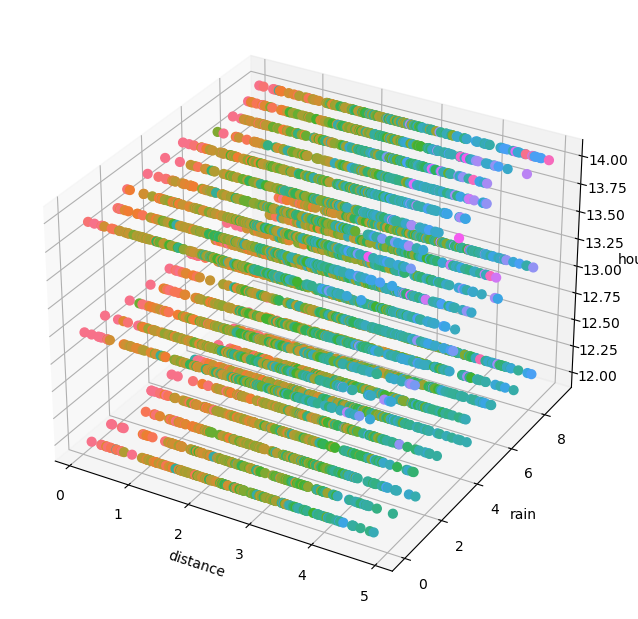

In [59]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['distance'], df['rain'], df['hour'], s=40, c=df['fee'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('distance')
ax.set_ylabel('rain')
ax.set_zlabel('hour')

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['day_of_week']])
print(transformed.toarray())

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
